In [1]:
what_were_covering = {1: "Data (prepare and load",
                      2: "build model",
                      3: "fit the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


In [2]:
import torch
from torch import nn #building blocks for Neural Networks
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Data (preparing and loading)
# Y = a + bX
weight = 0.7   #b
bias = 0.3     #a

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

# (tensor([[0.0000],
#          [0.0200],
#          [0.0400],
#          [0.0600],
#          [0.0800]]),
#  tensor([[0.3000],
#          [0.3140],
#          [0.3280],
#          [0.3420],
#          [0.3560]]))

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [4]:
len(X), len(y)
#(50, 50)

(50, 50)

In [5]:
# Create a training and test set with our data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] #40 training samples of X and y
X_test, y_test = X[train_split:], y[train_split:] #10 testing samples of X and y

len(X_train), len(y_train), len(X_test), len(y_test)
#(40, 40, 10, 10)

(40, 40, 10, 10)

In [56]:
import matplotlib.pyplot as plt

# Function to visualize data
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
    #Plots training data, test data, and compares predictions

    #Plot training data in blue
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    #Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

    #Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={"size": 14})

In [7]:
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits nn.Module
    def __init__(self):
        super().__init__()
        #Start with RANDOM numbers and continually update these to fit the data
        #we set the weights and bias with randn (random number)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        #Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # y = m*x + b

### Lets check what is inside our model

In [96]:
#Create a random seed to ensure similar values from our model every time
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())
# [Parameter containing:
#  tensor([0.3367], requires_grad=True),
#  Parameter containing:
#  tensor([0.1288], requires_grad=True)]

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [69]:
# List named parameters
model_0.state_dict()
#OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [70]:
#Our goal is to make these match
weight, bias
#(0.7, 0.3)

(0.7, 0.3)

In [71]:
X_test, y_test
# (tensor([[0.8000],   #  tensor([[0.8600],
#          [0.8200],   #          [0.8740],
#          [0.8400],   #          [0.8880],
#          [0.8600],   #          [0.9020],
#          [0.8800],   #          [0.9160],
#          [0.9000],   #          [0.9300],
#          [0.9200],   #          [0.9440],
#          [0.9400],   #          [0.9580],
#          [0.9600],   #          [0.9720],
#          [0.9800]]), #          [0.9860]]))

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [97]:
#Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds
# 0,0.39816
# 1,0.40490
# 2,0.41163
# 3,0.41836
# 4,0.42510
# 5,0.43183
# 6,0.43856
# 7,0.44530
# 8,0.45203
# 9,0.45877


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

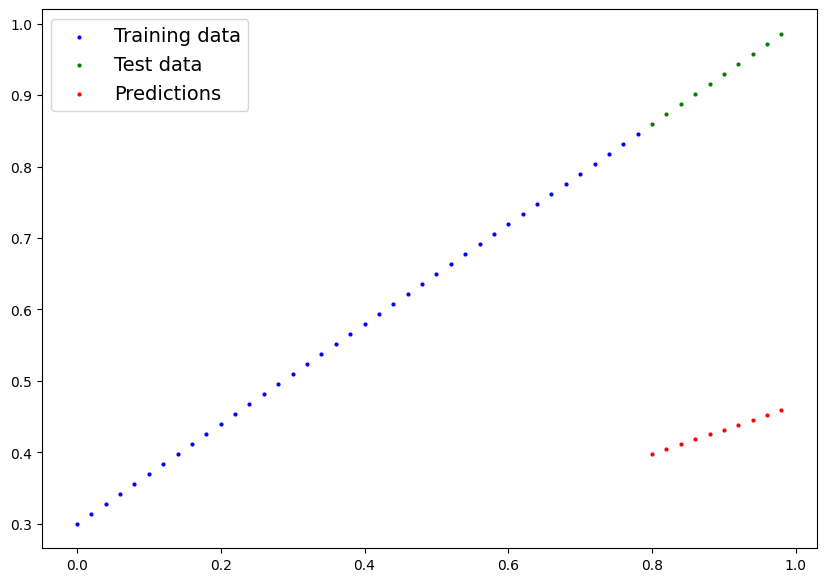

In [73]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [45]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [98]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer. Requires parameters, e.g. weight and bias
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate

In [99]:
epoch_count = []
loss_values = []
test_loss_values = []

In [100]:
torch.manual_seed(42)
# One loop through the data
epochs = 200

#1. Loop through the data
for epoch in range(epochs):
    #Set the model to training mode. Sets all parameters that have gradients to require gradients
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train) #learn patterns on the training data

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()  # think of as zero'ing out the optimizer

    # 4. Perform backpropagation with respect to the models parameters
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    # Use for model testing
    # Sets the model to evalutation mode. Turns off gradient tracking
    model_0.eval()
    with torch.inference_mode(): #turns off gradient tracking and a couple more things
        # 1. Forward pass
        test_pred = model_0(X_test)  #X_test has never been seen by the model

        # 2. Calculate the loss      #y_test has never been seen by the model
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | loss: {loss} | Test Loss: {test_loss}")
            print(test_pred, y_test)
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
# Epoch: 0 | loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
# Epoch: 10 | loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
# Epoch: 20 | loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
# Epoch: 30 | loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
# Epoch: 40 | loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
# Epoch: 50 | loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
# Epoch: 60 | loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
# Epoch: 70 | loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
# Epoch: 80 | loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
# Epoch: 90 | loss: 0.02788739837706089 | Test Loss: 0.06473556160926819


Epoch: 0 | loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
Epoch: 10 | loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
tensor([[0.5425],
        [0.5501],
        [0.5577],
        [0.5653],
        [0.5728],
        [0.5804],
        [0.5880],
        [0.5956],
        [0.6032],
        [0.6108]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])
Epoch: 20 | loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
tensor([[0.6680],
        [0.6764],
        [0.6848],
        [0.6

In [94]:
model_0.state_dict()
#OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

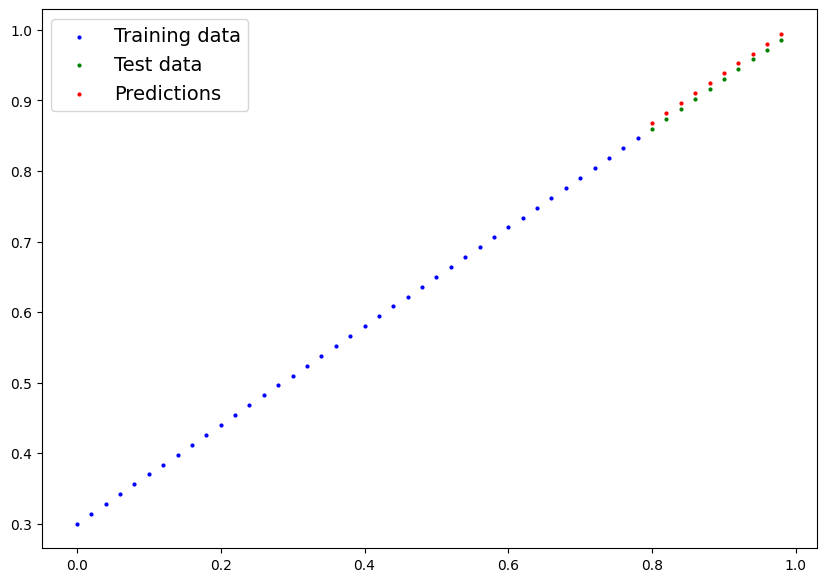

In [101]:
#update y predictions and graph
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_new)

Text(0.5, 0, 'Epochs')

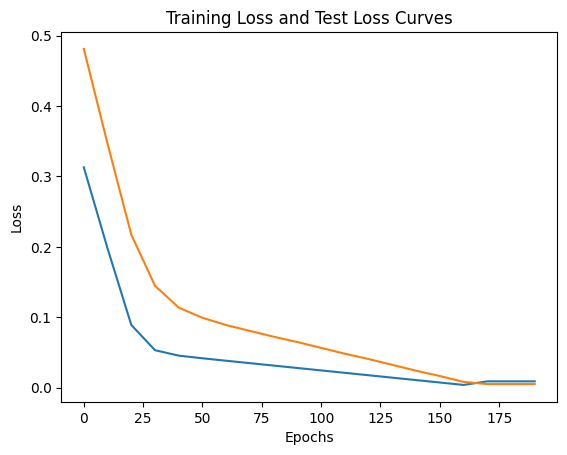

In [102]:
# Plotting Our Loss Functions
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Training Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss") #We must convert our tensors to numpy arrays so Matplotlib can work with them
plt.title("Training Loss and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")